In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc


if sys.platform == "darwin": # macOS
    rc("font", family="AppleGothic")
else:
    rc('font', family="Malgun Gothic")

plt.rcParams['axes.unicode_minus'] = False

In [4]:
path = r'./경기 데이터/'

In [5]:
data = pd.read_csv(path + 'ssg.csv',encoding = 'CP949')

In [6]:
data

,날짜,시간,경기,구장,비고
0,04.03(토),14:00,롯데vsSSG,문학,우천취소
1,04.04(일),14:00,롯데3vs5SSG,문학,-
2,04.06(화),18:30,한화1vs2SSG,문학,-
3,04.07(수),18:30,한화17vs0SSG,문학,-
4,04.08(목),18:30,한화4vs6SSG,문학,-
...,...,...,...,...,...
143,09.25(토),17:00,SSGvsKIA,광주,-
144,09.26(일),14:00,SSGvsKIA,광주,-
145,09.28(화),18:30,SSGvs삼성,대구,-
146,09.29(수),18:30,SSGvs삼성,대구,-


In [7]:
data.iloc[0]

날짜    04.03(토)
시간       14:00
경기     롯데vsSSG
구장          문학
비고        우천취소
Name: 0, dtype: object

In [8]:
data['경기']

0         롯데vsSSG
1       롯데3vs5SSG
2       한화1vs2SSG
3      한화17vs0SSG
4       한화4vs6SSG
          ...    
143      SSGvsKIA
144      SSGvsKIA
145       SSGvs삼성
146       SSGvs삼성
147       SSGvsNC
Name: 경기, Length: 148, dtype: object

In [9]:
drop_row_index = [not any(map(str.isdigit, x)) for x in data['경기']]

In [ ]:
l= []
for x in data['경기']:
    tmp = not any(map(str.isdigit,x))
    l.append(tmp)

In [10]:
drop_row_index

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 

In [13]:
data[drop_row_index].index

Int64Index([  0,  26,  29,  30,  38,  39,  40,  44,  48,  56,  62,  66,  84,
             93,  94,  95,  96,  97,  98, 101, 105, 109, 111, 118, 125, 134,
            135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147],
           dtype='int64')

In [17]:
data.drop(data[drop_row_index].index,inplace = True)

In [18]:
data

,날짜,시간,경기,구장,비고
1,04.04(일),14:00,롯데3vs5SSG,문학,-
2,04.06(화),18:30,한화1vs2SSG,문학,-
3,04.07(수),18:30,한화17vs0SSG,문학,-
4,04.08(목),18:30,한화4vs6SSG,문학,-
5,04.09(금),18:30,SSG5vs9LG,잠실,-
...,...,...,...,...,...
129,09.11(토),17:00,SSG2vs2KT,수원,-
130,09.12(일),14:00,SSG0vs10KT,수원,-
131,NaN,17:00,SSG2vs3KT,수원,-
132,09.14(화),18:30,한화11vs5SSG,문학,-


In [19]:
for i in range(1,len(data)):
    if pd.isnull(data.iloc[i,0]):
        data.iloc[i,0] = data.iloc[i-1,0]

In [20]:
data

,날짜,시간,경기,구장,비고
1,04.04(일),14:00,롯데3vs5SSG,문학,-
2,04.06(화),18:30,한화1vs2SSG,문학,-
3,04.07(수),18:30,한화17vs0SSG,문학,-
4,04.08(목),18:30,한화4vs6SSG,문학,-
5,04.09(금),18:30,SSG5vs9LG,잠실,-
...,...,...,...,...,...
129,09.11(토),17:00,SSG2vs2KT,수원,-
130,09.12(일),14:00,SSG0vs10KT,수원,-
131,09.12(일),17:00,SSG2vs3KT,수원,-
132,09.14(화),18:30,한화11vs5SSG,문학,-


In [21]:
data['날짜']

1      04.04(일)
2      04.06(화)
3      04.07(수)
4      04.08(목)
5      04.09(금)
         ...   
129    09.11(토)
130    09.12(일)
131    09.12(일)
132    09.14(화)
133    09.15(수)
Name: 날짜, Length: 109, dtype: object

In [22]:
'04.04(일)'[6]

'일'

In [23]:
data['날짜'][6]

'04.10(토)'

In [24]:
data['날짜'].str.slice(6,7)

1      일
2      화
3      수
4      목
5      금
      ..
129    토
130    일
131    일
132    화
133    수
Name: 날짜, Length: 109, dtype: object

In [25]:
data['요일']=data['날짜'].str.slice(6,7)

In [26]:
data

,날짜,시간,경기,구장,비고,요일
1,04.04(일),14:00,롯데3vs5SSG,문학,-,일
2,04.06(화),18:30,한화1vs2SSG,문학,-,화
3,04.07(수),18:30,한화17vs0SSG,문학,-,수
4,04.08(목),18:30,한화4vs6SSG,문학,-,목
5,04.09(금),18:30,SSG5vs9LG,잠실,-,금
...,...,...,...,...,...,...
129,09.11(토),17:00,SSG2vs2KT,수원,-,토
130,09.12(일),14:00,SSG0vs10KT,수원,-,일
131,09.12(일),17:00,SSG2vs3KT,수원,-,일
132,09.14(화),18:30,한화11vs5SSG,문학,-,화


In [27]:
data['날짜'].str.slice(0,5)

1      04.04
2      04.06
3      04.07
4      04.08
5      04.09
       ...  
129    09.11
130    09.12
131    09.12
132    09.14
133    09.15
Name: 날짜, Length: 109, dtype: object

In [28]:
data['날짜']=data['날짜'].str.slice(0,5)

In [29]:
data

,날짜,시간,경기,구장,비고,요일
1,04.04,14:00,롯데3vs5SSG,문학,-,일
2,04.06,18:30,한화1vs2SSG,문학,-,화
3,04.07,18:30,한화17vs0SSG,문학,-,수
4,04.08,18:30,한화4vs6SSG,문학,-,목
5,04.09,18:30,SSG5vs9LG,잠실,-,금
...,...,...,...,...,...,...
129,09.11,17:00,SSG2vs2KT,수원,-,토
130,09.12,14:00,SSG0vs10KT,수원,-,일
131,09.12,17:00,SSG2vs3KT,수원,-,일
132,09.14,18:30,한화11vs5SSG,문학,-,화


In [30]:
data[data['비고'] != '-']

,날짜,시간,경기,구장,비고,요일


In [33]:
data.drop('비고',axis = 1,inplace = True)

In [34]:
data

,날짜,시간,경기,구장,요일
1,04.04,14:00,롯데3vs5SSG,문학,일
2,04.06,18:30,한화1vs2SSG,문학,화
3,04.07,18:30,한화17vs0SSG,문학,수
4,04.08,18:30,한화4vs6SSG,문학,목
5,04.09,18:30,SSG5vs9LG,잠실,금
...,...,...,...,...,...
129,09.11,17:00,SSG2vs2KT,수원,토
130,09.12,14:00,SSG0vs10KT,수원,일
131,09.12,17:00,SSG2vs3KT,수원,일
132,09.14,18:30,한화11vs5SSG,문학,화


In [36]:
data['경기'][1]

'롯데3vs5SSG'

In [38]:
split_data = data['경기'].str.split('(\d+)',expand=True)
split_data

,0,1,2,3,4
1,롯데,3,vs,5,SSG
2,한화,1,vs,2,SSG
3,한화,17,vs,0,SSG
4,한화,4,vs,6,SSG
5,SSG,5,vs,9,LG
...,...,...,...,...,...
129,SSG,2,vs,2,KT
130,SSG,0,vs,10,KT
131,SSG,2,vs,3,KT
132,한화,11,vs,5,SSG


In [41]:
type(split_data[1][1])

str

In [39]:
home_team = 'SSG'

In [42]:
away = []
away_score = []
score = []
for i in range(len(data)):
    if split_data.iloc[i][0] == home_team:
        score.append(int(split_data.iloc[i][1]))
        away.append(split_data.iloc[i][4])
        away_score.append(int(split_data.iloc[i][3]))
    else:
        score.append(int(split_data.iloc[i][3]))
        away.append(split_data.iloc[i][0])
        away_score.append(int(split_data.iloc[i][1]))

data['점수']=score
data['상대'] = away
data['상대점수'] = away_score

In [43]:
data

,날짜,시간,경기,구장,요일,점수,상대,상대점수
1,04.04,14:00,롯데3vs5SSG,문학,일,5,롯데,3
2,04.06,18:30,한화1vs2SSG,문학,화,2,한화,1
3,04.07,18:30,한화17vs0SSG,문학,수,0,한화,17
4,04.08,18:30,한화4vs6SSG,문학,목,6,한화,4
5,04.09,18:30,SSG5vs9LG,잠실,금,5,LG,9
...,...,...,...,...,...,...,...,...
129,09.11,17:00,SSG2vs2KT,수원,토,2,KT,2
130,09.12,14:00,SSG0vs10KT,수원,일,0,KT,10
131,09.12,17:00,SSG2vs3KT,수원,일,2,KT,3
132,09.14,18:30,한화11vs5SSG,문학,화,5,한화,11


In [46]:
result =[]
for i in range(len(data)):
    if data.iloc[i]['점수'] == data.iloc[i]['상대점수']:
        result.append('무')
    elif data.iloc[i]['점수'] > data.iloc[i]['상대점수']:
        result.append('승')
    else:
        result.append('패')
data['결과'] = result

In [47]:
data

,날짜,시간,경기,구장,요일,점수,상대,상대점수,결과
1,04.04,14:00,롯데3vs5SSG,문학,일,5,롯데,3,승
2,04.06,18:30,한화1vs2SSG,문학,화,2,한화,1,승
3,04.07,18:30,한화17vs0SSG,문학,수,0,한화,17,패
4,04.08,18:30,한화4vs6SSG,문학,목,6,한화,4,승
5,04.09,18:30,SSG5vs9LG,잠실,금,5,LG,9,패
...,...,...,...,...,...,...,...,...,...
129,09.11,17:00,SSG2vs2KT,수원,토,2,KT,2,무
130,09.12,14:00,SSG0vs10KT,수원,일,0,KT,10,패
131,09.12,17:00,SSG2vs3KT,수원,일,2,KT,3,패
132,09.14,18:30,한화11vs5SSG,문학,화,5,한화,11,패


In [48]:
data.groupby('상대').size()

상대
KIA    13
KT     13
LG     12
NC     12
두산     10
롯데      9
삼성     12
키움     14
한화     14
dtype: int64

In [49]:
ncdata=data[data['상대']=='NC']

In [50]:
ncdata

,날짜,시간,경기,구장,요일,점수,상대,상대점수,결과
8,04.13,18:30,NC4vs2SSG,문학,화,2,NC,4,패
9,04.14,18:30,NC3vs0SSG,문학,수,0,NC,3,패
10,04.15,18:30,NC3vs9SSG,문학,목,9,NC,3,승
27,05.05,14:00,SSG13vs12NC,창원,수,13,NC,12,승
28,05.06,18:30,SSG1vs7NC,창원,목,1,NC,7,패
76,06.25,19:00,SSG10vs11NC,창원,금,10,NC,11,패
77,06.26,17:00,SSG10vs10NC,창원,토,10,NC,10,무
78,06.27,17:00,SSG3vs4NC,창원,일,3,NC,4,패
106,08.18,18:30,NC1vs6SSG,문학,수,6,NC,1,승
107,08.19,18:30,NC8vs5SSG,문학,목,5,NC,8,패


In [51]:
ncdata.groupby('결과').size()

결과
무    1
승    4
패    7
dtype: int64

<AxesSubplot:>

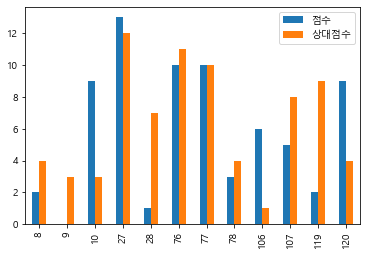

In [52]:
ncdata[['점수','상대점수']].plot.bar()

In [53]:
tmp = ncdata['점수'] - ncdata['상대점수']

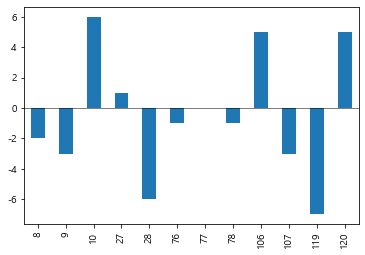

In [55]:
tmp.plot.bar()
plt.axhline(0,color = 'k', linewidth = 0.5)

In [56]:
data

,날짜,시간,경기,구장,요일,점수,상대,상대점수,결과
1,04.04,14:00,롯데3vs5SSG,문학,일,5,롯데,3,승
2,04.06,18:30,한화1vs2SSG,문학,화,2,한화,1,승
3,04.07,18:30,한화17vs0SSG,문학,수,0,한화,17,패
4,04.08,18:30,한화4vs6SSG,문학,목,6,한화,4,승
5,04.09,18:30,SSG5vs9LG,잠실,금,5,LG,9,패
...,...,...,...,...,...,...,...,...,...
129,09.11,17:00,SSG2vs2KT,수원,토,2,KT,2,무
130,09.12,14:00,SSG0vs10KT,수원,일,0,KT,10,패
131,09.12,17:00,SSG2vs3KT,수원,일,2,KT,3,패
132,09.14,18:30,한화11vs5SSG,문학,화,5,한화,11,패


In [57]:
data.groupby(['구장','결과']).count()

날짜  시간  경기  요일  점수  상대  상대점수
구장 결과                              
고척 승    3   3   3   3   3   3     3
   패    5   5   5   5   5   5     5
광주 승    4   4   4   4   4   4     4
   패    1   1   1   1   1   1     1
대구 무    1   1   1   1   1   1     1
   승    2   2   2   2   2   2     2
   패    3   3   3   3   3   3     3
대전 승    5   5   5   5   5   5     5
   패    1   1   1   1   1   1     1
문학 무    2   2   2   2   2   2     2
   승   30  30  30  30  30  30    30
   패   23  23  23  23  23  23    23
사직 승    3   3   3   3   3   3     3
   패    2   2   2   2   2   2     2
수원 무    1   1   1   1   1   1     1
   승    1   1   1   1   1   1     1
   패    6   6   6   6   6   6     6
잠실 승    3   3   3   3   3   3     3
   패    8   8   8   8   8   8     8
창원 무    1   1   1   1   1   1     1
   승    1   1   1   1   1   1     1
   패    3   3   3   3   3   3     3

In [58]:
tmp = data.groupby(['구장','결과']).count()['점수']

In [59]:
tmp

구장  결과
고척  승      3
    패      5
광주  승      4
    패      1
대구  무      1
    승      2
    패      3
대전  승      5
    패      1
문학  무      2
    승     30
    패     23
사직  승      3
    패      2
수원  무      1
    승      1
    패      6
잠실  승      3
    패      8
창원  무      1
    승      1
    패      3
Name: 점수, dtype: int64

In [60]:
tmp[:,'승'] / data.groupby('구장').count()['결과']

구장
고척    0.375000
광주    0.800000
대구    0.333333
대전    0.833333
문학    0.545455
사직    0.600000
수원    0.125000
잠실    0.272727
창원    0.200000
dtype: float64

In [66]:
ncdata

,날짜,시간,경기,구장,요일,점수,상대,상대점수,결과
8,04.13,18:30,NC4vs2SSG,문학,화,2,NC,4,패
9,04.14,18:30,NC3vs0SSG,문학,수,0,NC,3,패
10,04.15,18:30,NC3vs9SSG,문학,목,9,NC,3,승
27,05.05,14:00,SSG13vs12NC,창원,수,13,NC,12,승
28,05.06,18:30,SSG1vs7NC,창원,목,1,NC,7,패
76,06.25,19:00,SSG10vs11NC,창원,금,10,NC,11,패
77,06.26,17:00,SSG10vs10NC,창원,토,10,NC,10,무
78,06.27,17:00,SSG3vs4NC,창원,일,3,NC,4,패
106,08.18,18:30,NC1vs6SSG,문학,수,6,NC,1,승
107,08.19,18:30,NC8vs5SSG,문학,목,5,NC,8,패


In [67]:
data[data['구장']=='대전']

,날짜,시간,경기,구장,요일,점수,상대,상대점수,결과
51,05.28,18:30,SSG12vs3한화,대전,금,12,한화,3,승
52,05.29,17:00,SSG6vs2한화,대전,토,6,한화,2,승
53,05.30,14:00,SSG5vs1한화,대전,일,5,한화,1,승
70,06.18,18:30,SSG3vs4한화,대전,금,3,한화,4,패
71,06.19,17:00,SSG7vs5한화,대전,토,7,한화,5,승
72,06.20,17:00,SSG4vs3한화,대전,일,4,한화,3,승


In [61]:
tmp2 = tmp[:,'승'] / data.groupby('구장').count()['결과']

<AxesSubplot:xlabel='구장'>

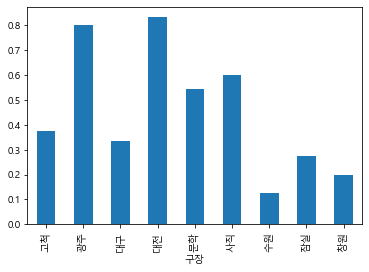

In [62]:
tmp2.plot.bar()